# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013
5,WESTERN MISSOURI MEDICAL CENTER,260097,MO,READM-30-HIP-KNEE-HRRP,141,NaN,1.5189,8.1,5.3,19.0,07/01/2010,06/30/2013
6,SAINT AGNES HOSPITAL,210011,MD,READM-30-HIP-KNEE-HRRP,390,NaN,1.5079,7.8,5.2,38.0,07/01/2010,06/30/2013
7,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HIP-KNEE-HRRP,178,NaN,1.5019,9.2,6.1,24.0,07/01/2010,06/30/2013
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013
9,FAUQUIER HOSPITAL,490023,VA,READM-30-HIP-KNEE-HRRP,256,NaN,1.4844,7.4,5.0,26.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [13]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.head()

C:\Users\owner\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


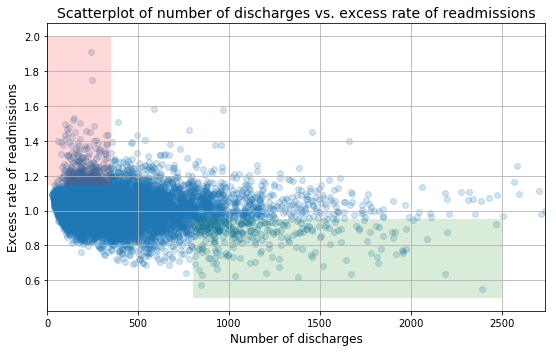

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

# A. Do you agree with the above analysis and recommendations?Why or why not?

I do not completely agree with the above analysis and preliminary report.There are a lot of missing statistical analysis and the 
entire analysis was based purely on graphs.Some of my observations are discussed as below:

1. There are a lot of missing data that was just dropped and replaced with NaN values.

2. The preliminary observations was made entirely based on the plot alone and other statistical parameter such as statistical significance and correlation coefficient was not calculated.

3. There was no "Hypothesis testing" done nor any kind of "Significance Testing".The hospitals were grouped into two and the boundaries were set to 1000 discharges.The group of people that lies in the boundary of 100<= number of discharges <=1000 was not considered into account.Therefore, the calculated percentages of hospitals with excess readmission rate 63% and 44%) is only for the two groups missing a big chunk of the hospitals in the population.

4. There was no solid conclusion based on statistical hypothesis or evidence.

5. In the statistics part, hospital capacity was divided in two groups which can imply that small hospitals have number of discharges <100. However in the recommendation part, small capacity hospitals was defined as hospitals with number of discharges <300 which is inconsistent and can create confusion.

In [14]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [16]:
hospital_read_df.shape

(16860, 12)

In [18]:
hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

In [21]:
missing_value=hospital_read_df[hospital_read_df['Number of Discharges']=='Not Available']
missing_value.isnull().sum()

Hospital Name                    0
Provider Number                  0
State                            0
Measure Name                     0
Number of Discharges             0
Footnote                      2234
Excess Readmission Ratio      3048
Predicted Readmission Rate    3048
Expected Readmission Rate     3048
Number of Readmissions        5282
Start Date                       0
End Date                         0
dtype: int64

In [22]:
new=hospital_read_df[hospital_read_df['Number of Discharges']!='Not Available']
new.shape

(11578, 12)

In [6]:
hospital_read_df['Excess Readmission Ratio'].describe()

count    13731.000000
mean         1.002582
std          0.091088
min          0.549500
25%          0.949500
50%          0.997100
75%          1.052350
max          1.909500
Name: Excess Readmission Ratio, dtype: float64

In [7]:
hospital_read_df['Excess Readmission Ratio'][hospital_read_df['Number of Discharges'] == 'Not Available'].describe()

count    2234.000000
mean        0.977254
std         0.081908
min         0.629900
25%         0.937050
50%         0.974600
75%         1.016075
max         1.328700
Name: Excess Readmission Ratio, dtype: float64

The difference in mean excess readmission ratio that is claimed between hospitals with large and small numbers of discharges is similar to the difference between hospitals with missing and non-missing discharge values.

In [8]:
hospital_read_df["Provider Number"].value_counts().head()

260081    5
140033    5
50125     5
390091    5
140209    5
Name: Provider Number, dtype: int64

In [9]:
hospital_read_df["Measure Name"].value_counts().head()

READM-30-AMI-HRRP         3372
READM-30-HIP-KNEE-HRRP    3372
READM-30-HF-HRRP          3372
READM-30-COPD-HRRP        3372
READM-30-PN-HRRP          3372
Name: Measure Name, dtype: int64

It looks like each hospital has multiple values for different conditions, potentially casting doubt on the independence of the observations.
The analysis as reported above focuses on two groups of hospitals. Strictly speaking, there is nothing wrong with looking at subgroups, but this particular grouping seems risky. The analysis above seems to carve out groups that support the hypothesis presented while ignoring data points that potentially contradict the hypothesis. The points in the red box look like they are asymmetric accross the horizontal axis, which to me raises concerns that some of the points either in that region or in the region opposite them are impacted by some type of data coding issue. Additionally, the the excess readmission variable is based on comparing observed and expected readmissions. The observed may deviate more from the expected for fewer numbers of events, so the low discharge hospitals may simply have more variable values rather than systematically higher. In this case, the red box is simply capitializing on noise. Likewise, the points in the red and green boxes may be driven by flaws in the modelling of the "expected" readmissions, rather than being driven by truely excessive readmission rates. The interpretation above also goes far beyond what is justified by the data. The analysis is purely correlational, so claims that the observed correlation are driven by lack of resources for smaller facilities are not justified. Changes in policy based on these results as the above report implies are also extremely premature.
If the core question is to identify correlation between discharge numbers and readmission ratio globally for all hospitals, as opposed to selected subsets, a more staightforward method would be to simply evaluate the sample correlation between these variables.

In [11]:
from scipy.stats import pearsonr
pearsonr(x, y)

(-0.093095542875904408, 1.5022756426464526e-23)

This result implies a slight negative correlation between readmission ratio and discharges, which is in the direction suggested by the above analysis. Caution is warranted in interpreting this in light of the issues I raise above with regard to missing data and outliers. It is difficult to interpret the size of correlations, but this correlation does not seems particuarly large, particularly in light of the appearance of the scatter plot. I believe that the scatter plot is fine if the red and green boxes are ignored.

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
1. Setup an appropriate hypothesis test.

$H$o= There is no significant correlation between hospital capacity(number of discharges) and readmission rates

$H$a = There is significant correlation between hospital capacity(number of discharges) and readmission rates

In [24]:
new=new[new['Number of Readmissions'].notnull()]
new.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [25]:
new['Number of Discharges']=pd.to_numeric(new['Number of Discharges'])

In [26]:
new.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [27]:
new.head()
new.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.008849,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.008849,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


# Correlation of number of discharges with Excess readmission rate

In [29]:
r1=-0.097398

In [30]:
r_squared=r1**2
r_squared

0.009486370404

Total Number of Hospitals

In [31]:
new.shape[0]

11497

# Q2B. Calculation p-value and comparing with threshold of alpha=0.05

pearson correlation coefficient, t-statitic & degrees of freedom used in calculating p-value and then compared to alpha=0.05

In [33]:
n1=11497

In [34]:
t1=(r1*((n1-2)/(1-r1**2))**0.5)
t1

-10.492386957113085

In [35]:
df1=n1-2
df1

11495

In [36]:
p_value1 = stats.t.sf(np.abs(t1), df1)*2  # two-sided pvalue = Prob(abs(t)>tt)
p_value1

1.2224686234119185e-25

Since the pvalue < 0.05 then we can safely reject the Null Hypothesis $H$o and accept the hypothesis $H$1 and say that there is 
a significant correlation between hospital capacity and excess readmission ratio.

Though correlation coefficient for number of discharges and excess readmission rate (-0.097398)- this number is statistically significant
The negative sign of the correlation coefficient means number of discharges and excess readmission rate has a negative correlation, a very small correlation. Meaning as the number of discharges increase there is a very very small increase in the excess readmission ratio.
Looking at the r_squared (pearson correlation coefficient squared) which is <1%, this means only <1% of variability in the exess readmission ratio can be explained by number of discharges.

# Q3B. Report statistical significance for $\alpha$ = .01.

The statistical significance for $\alpha$=.01 will be the same as when $\alpha$=.05 because p_value will be calculated the same way and assumed  $\alpha$ will not be part of p_value calculation.

# Q4B. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?¶

Statistical significance means that difference in groups is not likely due to sampling error and this difference (even if very small) is significant when sample size is large. For this sample sample size is 11,497 which is large enough. Practical significance on the other hand is about making sense of what the difference in two groups mean in real life and how it can be applied in practical situation.
Statistical significance and practical significance differ in this scenario where the small correlation (weak relationship) of number of discharges and excess readmission ration is very small but significant. The practical importance is seen using r_squared(Pearson correlation coefficient squared = 0.0095)<1%. This means that only 1% of variability in excess readmission ratio can be explained by number of discharges.
Looking at the data independently from the preliminary report, I divided the dataset into two sets. Set 1(hosp1) are those with excess readmission ration of <=1 and Set2 (hosp2) with excess readmission ratio >1 to see if there is any significant difference between the number of discharges for these two group of hospitals. Calculations are done below.

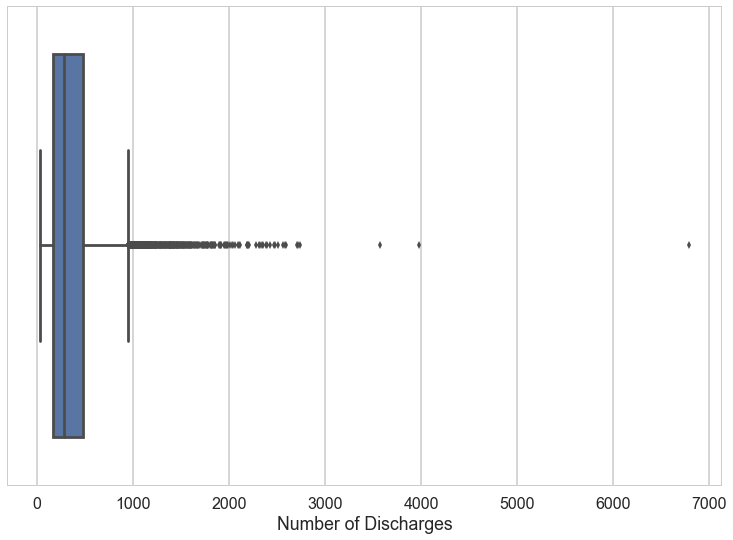

In [37]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x=new['Number of Discharges'])

In [38]:
new.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11497.000000,11497.000000,0.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,NaN,1.007504,17.984292,17.865695,63.633731
std,154274.374018,308.754590,NaN,0.091964,5.487651,5.240749,59.540296
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,160.000000,NaN,0.952600,16.300000,16.600000,24.000000
50%,250042.000000,282.000000,NaN,1.003500,19.000000,19.000000,45.000000
75%,390039.000000,474.000000,NaN,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,NaN,1.909500,32.800000,28.000000,879.000000


Large hospitals with Number of Discharges>1000 are only 463

In [39]:
bigcap=new[new['Number of Discharges']>1000]
bigcap.shape[0]

463

In [40]:
B1=bigcap[bigcap['Excess Readmission Ratio']>1]
B1.shape[0]

206

In [41]:
B2=bigcap[bigcap['Excess Readmission Ratio']<=1]
B2.shape[0]

257

In [42]:
hosp1=new[new['Excess Readmission Ratio']<=1]
hosp2=new[new['Excess Readmission Ratio']>1]

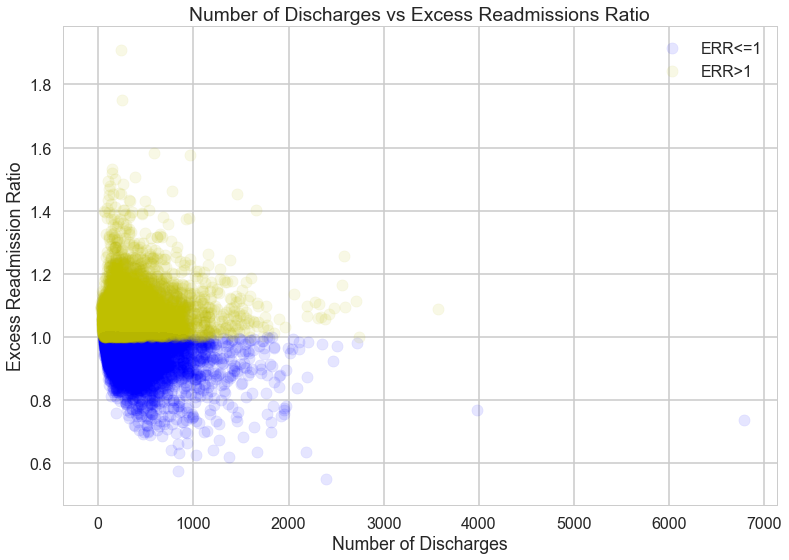

In [45]:
plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='b', label="ERR<=1", alpha=0.10)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='y', label='ERR>1', alpha=0.1)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()

Hospital 1

In [46]:
P1=5558/(5558+5939)
P1

0.4834304601200313

Hospital 2

In [47]:
P2=5939/(5558+5939)
P2

0.5165695398799687

# Using "Number of Discharges of two groups ERR>1 & ERR<=1"

Difference in mean of number of Discharges

In [48]:
mean_dis_diff=381.295250-350.652635
mean_dis_diff

30.642615000000035

Standard Deviation for difference in mean of number of discharges

In [49]:
std_dis_diff=np.sqrt((322.753963**2/5558) + (294.309313**2/5939))
std_dis_diff

5.7729524950854332

Using 0.05 significance level

In [50]:
moe=1.96*std_dis_diff
moe

11.314986890367448

Confidence Interval for differences in number of discharges

In [51]:
ci = mean_dis_diff + np.array([-1, 1]) * moe
ci

array([ 19.32762811,  41.95760189])

Degrees of Freedom

In [52]:
n1=5558
n2=5939
H1=(322.753963**2)/n1
H2=(294.309313**2)/n2

DF=((H1+H2)**2)/(((H1**2)/n1)+((H2**2)/n2))
DF

11217.039092559779

t-value statistics

In [53]:
t_val=(mean_dis_diff-0)/std_dis_diff
t_val

5.3079624379529138

In [54]:
p_value = stats.t.sf(np.abs(t_val), DF)*2  
p_value

1.1297252848786862e-07


p_value $<0.05$ and also $<0.01$ which means I. Ho can be rejected and I. H1 will be accepted
H1: There is significant difference between "number of discharges" for hospitals with exess readmission ratio <=1 and those with excess readmission ratio>1
There is 95% confidence that this difference in mean of "number discharges" is 19.33 to 42.96.
There is 99.95% confidence that this difference in mean of number of discharge is 11.48 to 49.80.

In [55]:
moe_2=3.32*std_dis_diff
moe_2

19.166202283683639

In [56]:
ci_2 = mean_dis_diff + np.array([-1, 1]) * moe_2
ci_2

array([ 11.47641272,  49.80881728])

# Q5B. Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?

Advantages: It has clear labels of axis titles and what it is all about
Disadvantages: It is difficult to see the difference or boundary of in the samples that have excess readmission ratio $<=1$ and those $>1$. It can b represented by different colors. I cannot quickly see the correlation of the two axis. Maybe a trendline will help.
Construct another plot that conveys the same information in a more direct manner.